In [2]:
using Pkg
Pkg.activate("../../")
# Pkg.activate("../../", io=devnull)

  Activating project at `c:\Users\jakdar\Uni\bachelorarbeit\VeryDiff`


In [4]:
using VeryDiff
using LinearAlgebra
using Plots

include("../util.jl")

RecipesBase.apply_recipe

In [5]:
struct Result
net :: String
spec :: String
status :: VeryDiff.VerificationStatus
runtime :: Int64
num_propagation :: Int64
num_input_splits :: Int64
num_neuron_splits :: Int64
initial_δ_bound :: Float64
final_δ_bound :: Float64
end

In [ ]:
function read_results(csv_dir::String)
    results = Result[]
    open(csv_dir, "r") do f
        while !eof(f)
            line = split(readline(f), ",")
            net = replace(line[1], " " => "")
            spec = replace(line[2], " " => "")
            status = replace(line[3], " " => "")
            status = status == "SAFE" ? VeryDiff.SAFE : (status == "UNSAFE" ? VeryDiff.UNSAFE : VeryDiff.UNKNOWN)
            runtime = parse(Int64, string(line[4]))
            num_propagation = parse(Int64, string(line[5]))
            num_input_splits = parse(Int64, string(line[6]))
            num_neuron_splits = parse(Int64, string(line[7]))
            initial_δ_bound = parse(Float64, string(line[8]))
            final_δ_bound = parse(Float64, string(line[9]))
            push!(results, Result(net, spec, status, runtime, num_propagation, num_input_splits, num_neuron_splits, initial_δ_bound, final_δ_bound))
        end
    end
    return results
end

read_results (generic function with 1 method)

In [ ]:
cur_dir = @__DIR__
exp_final_dir = "$cur_dir\\experiments_final"

verydiff_exp_name = "VeryDiff"
deepsplit_exp_name = "DeepSplit-Base"
deepsplit_alt_exp_name = "DeepSplit-Alt"
deepsplit_input_exp_name = "DeepSplit-Base-Input"
deepsplit_diffzono_exp_name = "DeepSplit-Base-DiffZono"
deepsplit_input_diffzono_exp_name = "DeepSplit-Base-Input-DiffZono"

acas_results = "acas-0.5\\results.csv"
mnist_results = "mnist-1.0\\results.csv"

verydiff_acas_csv_dir = joinpath(exp_final_dir, verydiff_exp_name, acas_results)
deepsplit_acas_csv_dir = joinpath(exp_final_dir, deepsplit_exp_name, acas_results)
deepsplit_alt_acas_csv_dir = joinpath(exp_final_dir, deepsplit_alt_exp_name, acas_results)
deepsplit_input_acas_csv_dir = joinpath(exp_final_dir, deepsplit_input_exp_name, acas_results)
deepsplit_diffzono_acas_csv_dir = joinpath(exp_final_dir, deepsplit_diffzono_exp_name, acas_results)
deepsplit_input_diffzono_acas_csv_dir = joinpath(exp_final_dir, deepsplit_input_diffzono_exp_name, acas_results)

println("...")

...


In [55]:
sort_func = res -> res.runtime
verydiff_acas_results = sort!(read_results(verydiff_acas_csv_dir), by=sort_func)
deepsplit_acas_results = sort!(read_results(deepsplit_acas_csv_dir), by=sort_func)
deepsplit_alt_acas_results = sort!(read_results(deepsplit_alt_acas_csv_dir), by=sort_func)
deepsplit_input_acas_results = sort!(read_results(deepsplit_input_acas_csv_dir), by=sort_func)
deepsplit_diffzono_acas_results = sort!(read_results(deepsplit_diffzono_acas_csv_dir), by=sort_func)
deepsplit_input_diffzono_acas_results = sort!(read_results(deepsplit_input_diffzono_acas_csv_dir), by=sort_func)

all_results = [verydiff_acas_results, deepsplit_acas_results, deepsplit_alt_acas_results, deepsplit_input_acas_results, deepsplit_diffzono_acas_results, deepsplit_input_diffzono_acas_results]

6-element Vector{Vector{Result}}:
 [Result("ACASXU_run2a_1_9_batch_2000_pruned5", "prop_4", VeryDiff.SAFE, 483285, 1, 0, 0, 0.0016847800387558521, 0.0016847800387558521), Result("ACASXU_run2a_1_9_batch_2000_pruned5", "prop_3", VeryDiff.SAFE, 513286, 1, 0, 0, 0.0006034115948338539, 0.0006034115948338539), Result("ACASXU_run2a_5_9_batch_2000_pruned5", "prop_3", VeryDiff.SAFE, 612309, 1, 0, 0, 0.4470737258867684, 0.4470737258867684), Result("ACASXU_run2a_2_9_batch_2000_pruned5", "prop_10", VeryDiff.UNSAFE, 1198747, 1, 0, 0, 13675.722857652177, 13675.722857652177), Result("ACASXU_run2a_4_1_batch_2000_pruned5", "prop_5", VeryDiff.UNSAFE, 1357577, 1, 0, 0, 3751.1877564072206, 3751.1877564072206), Result("ACASXU_run2a_2_9_batch_2000_pruned5", "prop_26", VeryDiff.UNSAFE, 1401937, 1, 0, 0, 31557.750946350257, 31557.750946350257), Result("ACASXU_run2a_4_9_batch_2000_pruned5", "prop_10", VeryDiff.UNSAFE, 1454556, 1, 0, 0, 12677.168538804644, 12677.168538804644), Result("ACASXU_run2a_2_9_batch_200

In [91]:
function count_solved(results::Vector{Result})
    count(r -> r.status != VeryDiff.UNKNOWN, results)
end

count_solved (generic function with 1 method)

In [95]:
x = [1:count_solved(results) for results in all_results]
y = [[results[k].runtime / 1e9 for k in x[i]] for (i, results) in enumerate(all_results)]
# y = r -> [count(r -> r.runtime <= k * 1e9 && r.status != VeryDiff.UNKNOWN, r) for k in x]

6-element Vector{Vector{Float64}}:
 [0.000483285, 0.000513286, 0.000612309, 0.001198747, 0.001357577, 0.001401937, 0.001454556, 0.001456381, 0.001491398, 0.001529389  …  5.465051756, 7.579443666, 7.594409729, 8.264870775, 8.530710178, 9.05766453, 9.261310511, 9.435128518, 9.988624942, 13.862977662]
 [0.00049026, 0.000507911, 0.000758987, 0.001083083, 0.001140711, 0.001263347, 0.001342369, 0.001437841, 0.001450221, 0.001456764  …  0.002600382, 0.013181515, 0.015258433, 0.117770397, 0.157245569, 0.174232404, 0.906424509, 1.975996233, 4.56518703, 116.885871935]
 [0.000415317, 0.0004369, 0.000452795, 0.0011064, 0.001109351, 0.001169736, 0.001296943, 0.001327802, 0.001354314, 0.001462954  …  0.001659251, 0.002093318, 0.002177528, 0.130100339, 0.15741398, 0.16523416, 0.922911619, 1.987540257, 4.581955606, 116.463796039]
 [0.000391467, 0.000455443, 0.000501573, 0.001053097, 0.0011658, 0.001260351, 0.001394274, 0.001409246, 0.001461428, 0.00147348  …  8.481328218, 8.489300923, 9.043449796, 12.

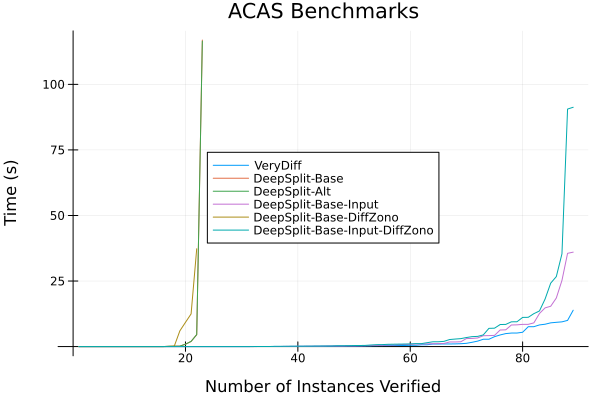

In [146]:
# linewidth = 2.0
plot(x[1], y[1], label="VeryDiff", title="ACAS Benchmarks", xlabel="Number of Instances Verified", ylabel="Time (s)", legend=:legend, framestyle=:origin)
plot!(x[2], y[2], label="DeepSplit-Base")
plot!(x[3], y[3], label="DeepSplit-Alt")
plot!(x[4], y[4], label="DeepSplit-Base-Input")
plot!(x[5], y[5], label="DeepSplit-Base-DiffZono")
plot!(x[6], y[6], label="DeepSplit-Base-Input-DiffZono")